In [ ]:
# more information about autoencoding
# http://nbviewer.jupyter.org/github/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/1.7-autoencoder.ipynb`


In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# study more on the url above

Using TensorFlow backend.
/Users/r3dmaohong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [ ]:
#.
#.
#.
#.
#.

In [10]:
# image denoising

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D
from keras.models import Model

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # 使用`channels_first`圖像數據格式
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # 使用`channels_first`圖像數據格式

noise_factor = 0.5 # 噪點因子
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

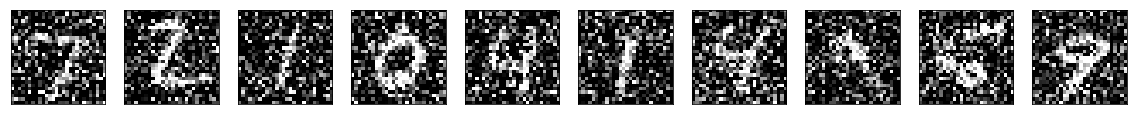

In [11]:
n = 10
plt.figure(figsize=(20, 2))

for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
input_img_conv2 = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_conv2)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded_conv2 = MaxPool2D((2, 2), padding='same')(x)

# 到這個節點的編碼表示的結構是 (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_conv2)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_conv2= Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# 串接編碼(encoded)與解碼(decoded)的模型
autoencoder_conv2 = Model(input_img_conv2, decoded_conv2)

# 模型參數設定
autoencoder_conv2.compile(optimizer='adadelta', loss='binary_crossentropy')

# 模型參數設定
autoencoder_conv2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [13]:
autoencoder_conv2.fit(x_train_noisy, x_train,
                     epochs=100,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 234s 4ms/step - loss: 0.1908 - val_loss: 0.1253
Epoch 2/100
60000/60000 [==============================] - 202s 3ms/step - loss: 0.1232 - val_loss: 0.1173
Epoch 3/100
60000/60000 [==============================] - 185s 3ms/step - loss: 0.1148 - val_loss: 0.1139
Epoch 4/100
60000/60000 [==============================] - 182s 3ms/step - loss: 0.1102 - val_loss: 0.1071
Epoch 5/100
60000/60000 [==============================] - 200s 3ms/step - loss: 0.1075 - val_loss: 0.1052
Epoch 6/100
60000/60000 [==============================] - 201s 3ms/step - loss: 0.1056 - val_loss: 0.1034
Epoch 7/100
60000/60000 [==============================] - 195s 3ms/step - loss: 0.1044 - val_loss: 0.1018
Epoch 8/100
60000/60000 [==============================] - 191s 3ms/step - loss: 0.1033 - val_loss: 0.1011
Epoch 9/100
60000/60000 [==============================] - 189s 3ms/step - loss: 0.1024 - val_

60000/60000 [==============================] - 199s 3ms/step - loss: 0.0948 - val_loss: 0.0945
Epoch 77/100
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0947 - val_loss: 0.0944
Epoch 78/100
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0947 - val_loss: 0.0943
Epoch 79/100
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0947 - val_loss: 0.0943
Epoch 80/100
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0946 - val_loss: 0.0942
Epoch 81/100
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0947 - val_loss: 0.0941
Epoch 82/100
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0946 - val_loss: 0.0941
Epoch 83/100
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0946 - val_loss: 0.0941
Epoch 84/100
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0945 - val_loss: 0.0940
Epoch 85/100
60000/60000 [===============

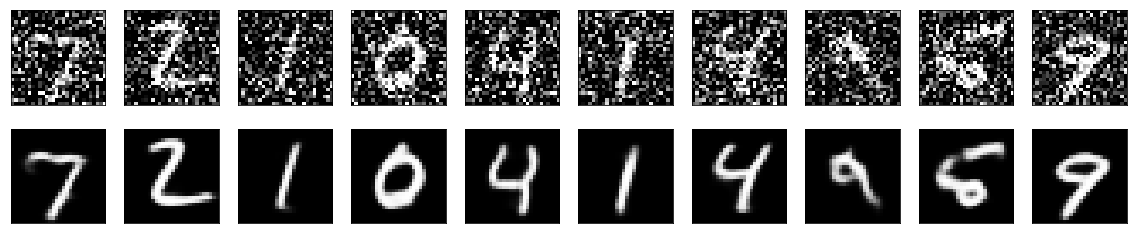

In [14]:
decoded_imgs_conv2 = autoencoder_conv2.predict(x_test_noisy)

n = 10 # 我們想展示圖像的數量
plt.figure(figsize=(20, 4))

for i in range(n):
    # 秀出原圖像
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 秀出重建圖像
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs_conv2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()